<a href="https://colab.research.google.com/github/Gustavo7890/Machine-learning/blob/main/matriz_confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install -q tensorflow-gpu==2.0.0-beta1
!pip install tensorflow-addons

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.4 MB/s eta 0:00:00


In [24]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.metrics import Recall
import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.12.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 [==============================] - 0s 0us/step


In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1580 - accuracy: 0.9520 - val_loss: 0.0369 - val_accuracy: 0.9871
Epoch 2/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0384 - val_accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0259 - val_accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0319 - val_accuracy: 0.9893
Epoch 5/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0348 - val_accuracy: 0.9886


In [10]:
y_true=test_labels
y_pred= np.argmax(model.predict(test_images), axis=1)

313/313 [==============================] - 4s 13ms/step


In [11]:
classes=[0,1,2,3,4,5,6,7,8,9]

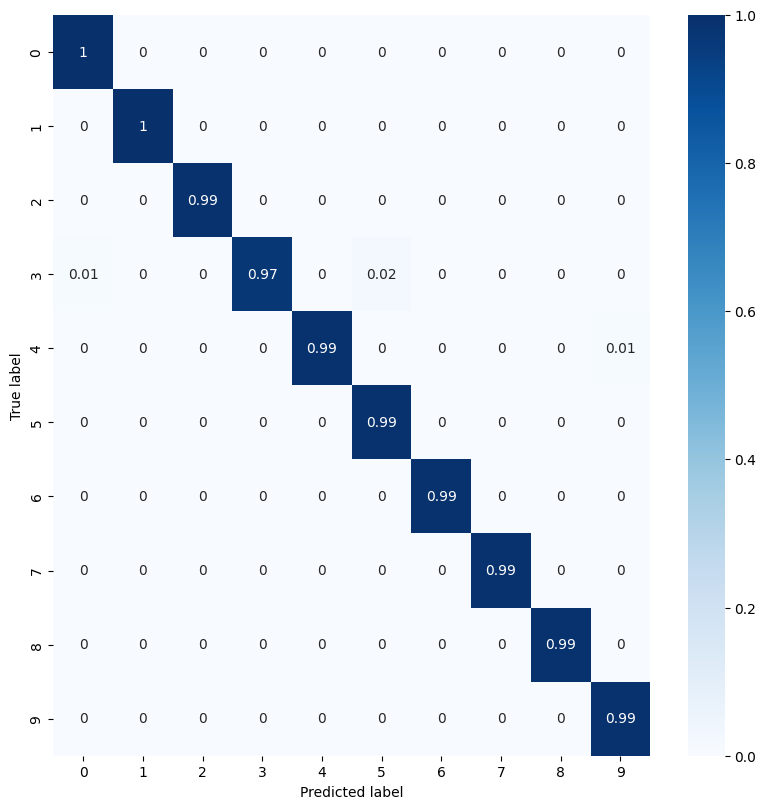

In [12]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
def calculate_evaluation_metrics(y_true, y_pred, num_classes=10):

  # Calcula a sensibilidade.
  sensitivity = tf.reduce_mean(tf.cast(tf.logical_and(y_true == 1, y_pred == 1), tf.float32))

  # Calcula a especificidade.
  specificity = tf.reduce_mean(tf.cast(tf.logical_and(y_true == 0, y_pred == 0), tf.float32))

  # Calcula a acurácia.
  accuracy = tf.reduce_mean(tf.cast(tf.equal(y_true, y_pred), tf.float32))

  # Calcula a precisão.
  precision = tf.reduce_mean(tf.cast(tf.logical_and(y_pred == 1, y_true == 1), tf.float32))

  # Calcula o F-score.
  f_score = 2 * precision * sensitivity / (precision + sensitivity)

  # Retorna um dicionário com as métricas de avaliação.
  metrics = {
      "sensitivity": sensitivity,
      "specificity": specificity,
      "accuracy": accuracy,
      "precision": precision,
      "f_score": f_score,
  }

  return metrics

resultado = calculate_evaluation_metrics(y_true, y_pred, num_classes=10)
print(resultado)

{'sensitivity': <tf.Tensor: shape=(), dtype=float32, numpy=0.1133>, 'specificity': <tf.Tensor: shape=(), dtype=float32, numpy=0.0976>, 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.9895>, 'precision': <tf.Tensor: shape=(), dtype=float32, numpy=0.1133>, 'f_score': <tf.Tensor: shape=(), dtype=float32, numpy=0.1133>}
